In [1]:
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset
from torchvision import transforms
from torch.autograd import Variable
from torchvision import models
from torchviz import make_dot
from tensorboardX import SummaryWriter

import copy
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('Week2_Iris鸢尾花数据集\Week2_Iris\TrainData.csv')
train_data = np.array(train_data)
test_data = pd.read_csv('Week2_Iris鸢尾花数据集\Week2_Iris\TestData.csv')
test_data = np.array(test_data)

In [3]:
def standardized(data):
    mean = data.mean(axis=0)         #计算平均数
    std = data.std(axis=0)     #计算标准差
    standardized_data = (data - mean) / std
    return standardized_data

In [4]:
xtrain_data = train_data[:100,0:4]
xtrain_data = standardized(xtrain_data)
xtrain_data = torch.from_numpy(xtrain_data)
ytrain_data = train_data[:100,4]
ytrain_data = torch.from_numpy(ytrain_data)

xval_data = train_data[100:,0:4]
xval_data = standardized(xval_data)
xval_data = torch.from_numpy(xval_data)
yval_data = train_data[100:,4]
yval_data = torch.from_numpy(yval_data)

train_dataset = TensorDataset(xtrain_data,ytrain_data)
val_dataset = TensorDataset(xval_data,yval_data)


In [5]:
xtest_data = test_data[:,0:4]
xtest_data = standardized(xtest_data)
xtest_data = torch.from_numpy(xtest_data)
ytest_data = test_data[:,4]

In [6]:
class classifier1(nn.Module):
    def __init__(self,):
        super(classifier1,self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(4,64),nn.ReLU(inplace=True))
        self.layer2 = nn.Linear(64,3)
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        return out

In [7]:
loss_function = nn.CrossEntropyLoss()
def train_model(model,optimizer,trainloader,valloader):
    best_loss = 10
    num_epoches = 300
    train_loss0 = []
    for epoch in range(num_epoches): 
        model.train()
        train_loss = 0
        for batch_idx,data in enumerate(trainloader):
            x,label = data
            x,label = Variable(x),Variable(label)
            x = x.to(torch.float32)
            label = label.long()
            optimizer.zero_grad()
            output = model(x)
            loss = loss_function(output, label)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        train_loss0.append(train_loss)
        if epoch % 5 == 0:
            model.eval()
            val_loss = 0
            for batch_idx,data in enumerate(valloader):
                x,label = data
                x,label = Variable(x),Variable(label)
                x = x.to(torch.float32)
                label = label.long()
                output = model(x)
                loss = loss_function(output, label)
                val_loss += loss.item()
            if val_loss < best_loss :
                best_loss = val_loss
                best_model_wts = copy.deepcopy(model.state_dict())
    model.load_state_dict(best_model_wts)
    out = model(xtest_data.to(torch.float32))
    out = out.detach().numpy()
    return out,train_loss0

In [7]:
# loss_function = nn.CrossEntropyLoss()
# def train_model(model,optimizer,trainloader):
#     best_loss = 10
#     num_epoches = 300
#     train_loss0 = []
#     for epoch in range(num_epoches): 
#         model.train()
#         train_loss = 0
#         for batch_idx,data in enumerate(trainloader):
#             x,label = data
#             x,label = Variable(x),Variable(label)
#             x = x.to(torch.float32)
#             label = label.long()
#             optimizer.zero_grad()
#             output = model(x)
#             loss = loss_function(output, label)
#             loss.backward()
#             train_loss += loss.item()
#             optimizer.step()
#         train_loss0.append(train_loss)
#         if train_loss < best_loss :
#             best_loss = train_loss
#             best_model_wts = copy.deepcopy(model.state_dict())
#     model.load_state_dict(best_model_wts)
#     out = model(xtest_data.to(torch.float32))
#     out = out.detach().numpy()
#     return out,train_loss0

In [9]:
def re_ypre(out):
    ypre = []
    for i in out:
        i = i.tolist()
        ypre.append(i.index(max(i))) 
    ypre = np.array(ypre)
    return ypre

#一个隐藏层，64个节点

In [10]:
num_epoches = 300
trainloader = DataLoader(train_dataset,batch_size=20,shuffle=True)
valloader = DataLoader(val_dataset,batch_size=5,shuffle=True)
model1 = classifier1()
optimizer11 = optim.Adam(model1.parameters(), lr=0.1, betas=(0.9,0.999), eps=1e-08, weight_decay=0.1)
out11,train_loss1 = train_model(model1,optimizer11,trainloader,valloader)
ypre1 = re_ypre(out11)
con_matrix1 = confusion_matrix(ytest_data,ypre1)
print('1(64)&Adam(weight_decay=0.1)在测试集上的混淆矩阵\n',con_matrix1)

1(64)&Adam(weight_decay=0.1)在测试集上的混淆矩阵
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [11]:
with SummaryWriter(comment='classifier1')as w:
    w.add_graph(model, (x,))

NameError: name 'model' is not defined

In [295]:
optimizer12 = optim.Adam(model1.parameters(), lr=0.01, betas=(0.9,0.999), eps=1e-08, weight_decay=0)
out12,train_loss2 = train_model(model1,optimizer12,trainloader)
ypre2 = re_ypre(out12)
con_matrix2 = confusion_matrix(ytest_data,ypre2)
print('1(64)&Adam(weight_decay=0)在测试集上的混淆矩阵\n',con_matrix2)

1(64)&Adam(weight_decay=0)在测试集上的混淆矩阵
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [267]:
optimizer13 = optim.SGD(model1.parameters(), lr=0.001, weight_decay= 0, momentum = 0.5, nesterov = True)
out13,train_loss3 = train_model(model1,optimizer13,trainloader,valloader)
ypre3 = re_ypre(out13)
con_matrix3 = confusion_matrix(ytest_data,ypre3)
print('1(64)&SGD在测试集上的混淆矩阵\n',con_matrix3)

1(64)&SGD在测试集上的混淆矩阵
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [228]:
optimizer14 = optim.Adadelta(model1.parameters(), lr=0.1, rho=0.9, eps=1e-08, weight_decay=0.1)
out14,train_loss4 = train_model(model1,optimizer14,trainloader,valloader)
ypre4 = re_ypre(out14)
con_matrix4 = confusion_matrix(ytest_data,ypre4)
print('1(64)&Adadelta在测试集上的混淆矩阵\n',con_matrix3)

1(64)&Adadelta在测试集上的混淆矩阵
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [229]:
optimizer15 = optim.Adagrad(model1.parameters(), lr=0.1, lr_decay=0, weight_decay=0.1, initial_accumulator_value=0, eps=1e-10)
out15,train_loss5 = train_model(model1,optimizer15,trainloader,valloader)
ypre5 = re_ypre(out15)
con_matrix5 = confusion_matrix(ytest_data,ypre5)
print('1(64)&Adagrad在测试集上的混淆矩阵\n',con_matrix3)

1(64)&Adagrad在测试集上的混淆矩阵
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


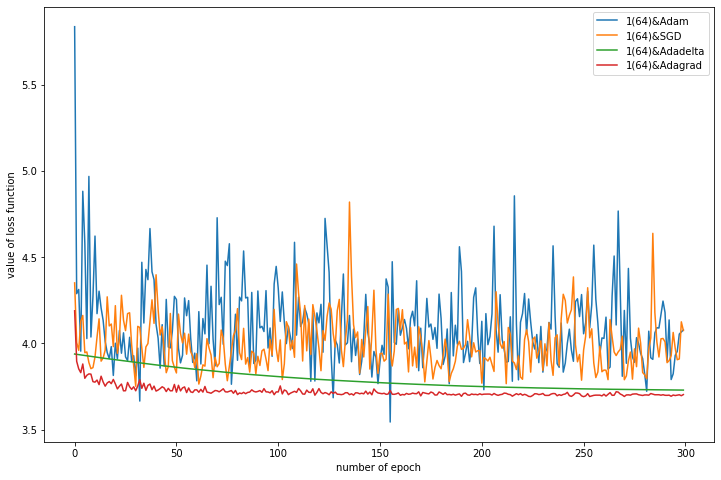

In [230]:
fig = plt.figure(figsize=(12,8))
plt.plot(list(range(num_epoches)),train_loss1,label='1(64)&Adam')
plt.plot(list(range(num_epoches)),train_loss2,label='1(64)&Adam(weight_decay=0)')
plt.plot(list(range(num_epoches)),train_loss3,label='1(64)&SGD')
plt.plot(list(range(num_epoches)),train_loss4,label='1(64)&Adadelta')
plt.plot(list(range(num_epoches)),train_loss5,label='1(64)&Adagrad')
plt.xlabel('number of epoch')
plt.ylabel('value of loss function')
plt.legend()
plt.show()

optim.Adam中参数
增加weight_decay，在训练集上的损失函数值会变得很波动，且损失值较大，但从混淆矩阵可以看到在测试集上的效果更好，
当weight_decay=0时可能在训练集上存在过拟合的问题,
optim.SGD
出现了上述相同的情况。
optim.Adadelta
调节weight_decay，损失值并没有变得很波动，在测试集上效果非常好
optim.Adagrad
类似Adadelta

#尝试使用随机梯度下降训练模型，并比较使用不同的 Batchsize(每次用于训练神经网络的样本数量)时，模型训练的效果。

In [22]:
valloader = DataLoader(val_dataset,batch_size=5,shuffle=True)
optimizer = optim.SGD(model1.parameters(), lr=0.001, weight_decay= 0, momentum = 0.5)
# optimizer = optim.SGD(model1.parameters(), lr=0.001, weight_decay= 0, momentum = 0.5, nesterov = True)
acc_list = []
precision_list = []
recall_list = []
for i in range(1,60,5):
    trainloader1 = DataLoader(train_dataset,batch_size=i,shuffle=False)
    out1,train_loss = train_model(model1,optimizer,trainloader1,valloader)
    ypre1 = re_ypre(out1)
    acc = accuracy_score(ytest_data,ypre1)
    acc_list.append(acc)
    pre = precision_score(ytest_data,ypre1,average='weighted')
    precision_list.append(pre)
    recall = recall_score(ytest_data,ypre1,average='weighted')
    recall_list.append(recall)   

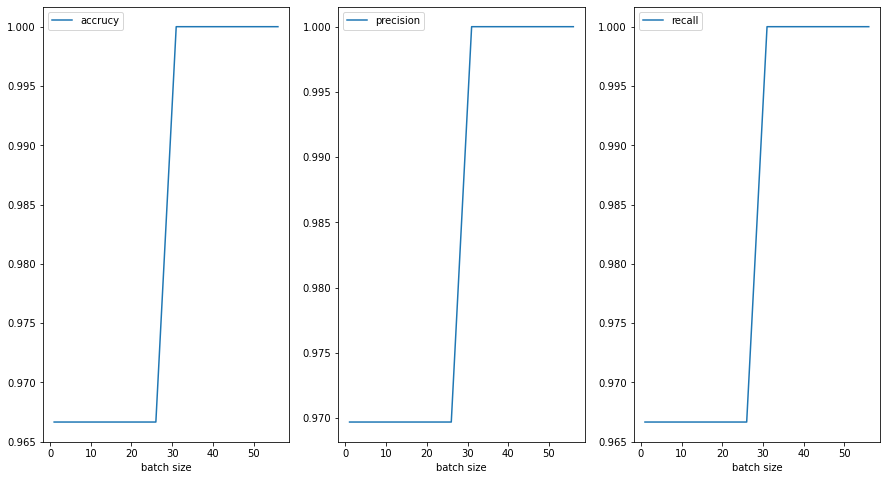

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(131)
plt.plot(list(range(1,60,5)),acc_list,label='accrucy')
plt.xlabel('batch size')
plt.legend()
plt.subplot(132)
plt.plot(list(range(1,60,5)),precision_list,label = 'precision')
plt.xlabel('batch size')
plt.legend()
plt.subplot(133)
plt.plot(list(range(1,60,5)),recall_list,label = 'recall')
plt.xlabel('batch size')
plt.legend()
plt.show()

#尝试不同的隐藏层和节点

In [ ]:
class classifier2(nn.Module):
    def __init__(self,):
        super(classifier2,self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(4,32),nn.ReLU(inplace=True))
        self.layer2 = nn.Sequential(nn.Linear(32,32),nn.ReLU(inplace=True))
        self.layer3 = nn.Linear(32,3)
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        return out

In [241]:
model2 = classifier2()
optimizer21 = optim.Adam(model2.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01)
out21,train_loss1 = train_model(model2,optimizer21)
ypre1 = re_ypre(out21)
con_matrix1 = confusion_matrix(ytest_data,ypre1)
print('1(32)+1(32)&Adam在测试集上的混淆矩阵\n',con_matrix1)

1(32)+1(32)&Adam在测试集上的混淆矩阵
 [[10  0  0]
 [ 0 10  0]
 [ 0  4  6]]


In [239]:
net_plot = make_dot(model2(xtest_data.to(torch.float32)),params = dict(model2.named_parameters()))
net_plot.view()


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [ ]:
#torch.save(model.state_dict(),"Linear.pth")

In [ ]:
#nn.functional.cross_entropy(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
#optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)